**Insurance Cost Prediction**

Problem Statement:

Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals. By leveraging machine learning techniques, insurers can predict more accurately the insurance costs tailored to individual profiles, leading to more competitive pricing and better risk management,


In [56]:
#Importing necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

In [57]:
df = pd.read_csv('insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [58]:
df.shape

(986, 11)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


Insight:

- Age ranges from 18 to 66, Average age is found to be 42 years approximately.
- Height ranges from 145 cm to 188 cm, with an average of approximately 168 cm.
- Weight ranges from 51 kg to 132 kg, with an average of approximately 77 kg.
- Diabetes: About 42% of the individuals have diabetes.
- BloodPressureProblems: About 47% of the individuals have blood pressure problems.
- AnyTransplants: About 5.6% of the individuals have had transplants.
- AnyChronicDiseases: About 18% of the individuals have chronic diseases.
- KnownAllergies: About 21.5% of the individuals have known allergies.
- HistoryOfCancerInFamily: About 11.8% of the individuals have a family history of cancer.
- NumberOfMajorSurgeries: Individuals have had up to 3 major surgeries, with a mean of approximately 0.67.
- Premium Price ranges from 15,000 to 40,000, with a mean of approximately 24,337.

In [61]:
#NULL Value check
df.isnull().sum()/ len(df)*100

,0
Age,0.0
Diabetes,0.0
BloodPressureProblems,0.0
AnyTransplants,0.0
AnyChronicDiseases,0.0
Height,0.0
Weight,0.0
KnownAllergies,0.0
HistoryOfCancerInFamily,0.0
NumberOfMajorSurgeries,0.0


There are no null values present in the dataset.

**Outlier Detection**

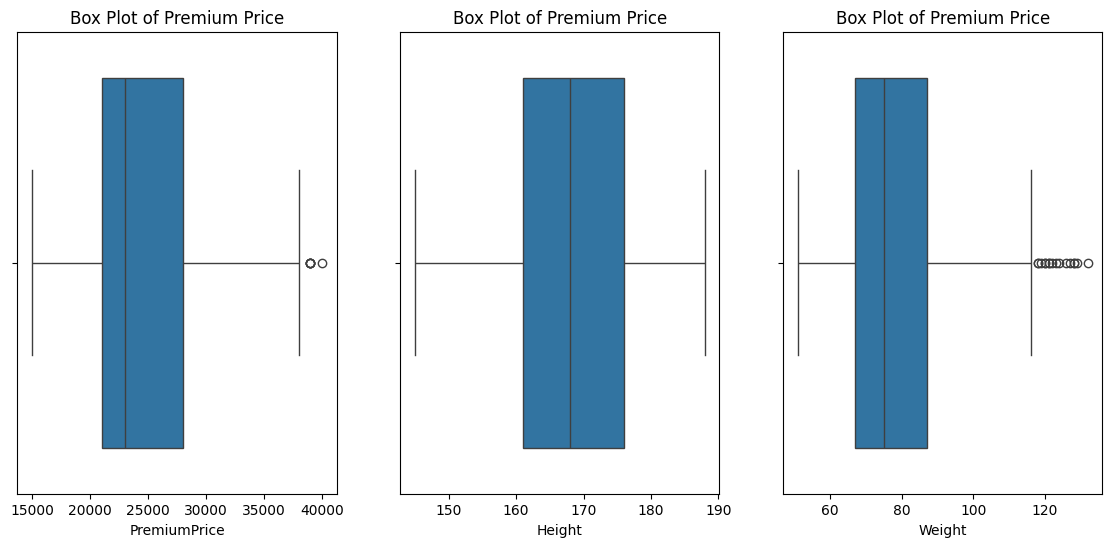

In [62]:
plt.figure(figsize=(14, 6))
plt.subplot(1,3,1)
sns.boxplot(data=df, x='PremiumPrice')
plt.title('Box Plot of Premium Price')

plt.subplot(1,3,2)
sns.boxplot(data=df, x='Height')
plt.title('Box Plot of Premium Price')

plt.subplot(1,3,3)
sns.boxplot(data=df, x='Weight')
plt.title('Box Plot of Premium Price')
plt.show()

- There are outliers present in PremiumPrice and Weight column.

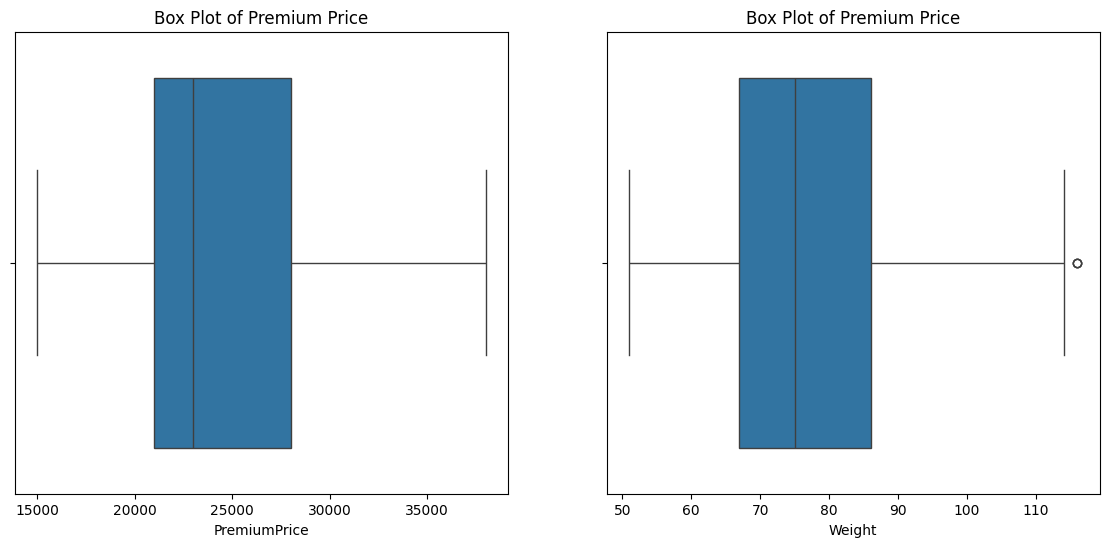

In [63]:
# Calculate the IQR for each column
Q1_PremiumPrice = df['PremiumPrice'].quantile(0.25)
Q3_PremiumPrice = df['PremiumPrice'].quantile(0.75)
IQR_PremiumPrice = Q3_PremiumPrice - Q1_PremiumPrice

Q1_weight = df['Weight'].quantile(0.25)
Q3_weight = df['Weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

# Calculate the lower and upper bounds for each column
lower_bound_PremiumPrice = Q1_PremiumPrice - 1.5 * IQR_PremiumPrice
upper_bound_PremiumPrice = Q3_PremiumPrice + 1.5 * IQR_PremiumPrice

lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

#Identifying outliers in each column
outliers_PremiumPrice = df[(df['PremiumPrice'] < lower_bound_PremiumPrice) | (df['PremiumPrice'] > upper_bound_PremiumPrice)]
outliers_weight = df[(df['Weight'] < lower_bound_weight) | (df['Weight'] > upper_bound_weight)]

#Replacing the outliers with median
df.loc[(df['PremiumPrice'] < lower_bound_PremiumPrice), 'PremiumPrice'] = df['PremiumPrice'].median()
df.loc[(df['PremiumPrice'] > upper_bound_PremiumPrice), 'PremiumPrice'] = df['PremiumPrice'].median()

df.loc[(df['Weight'] < lower_bound_weight), 'Weight'] = df['Weight'].median()
df.loc[(df['Weight'] > upper_bound_weight), 'Weight'] = df['Weight'].median()

#Outlier Check
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='PremiumPrice')
plt.title('Box Plot of Premium Price')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Weight')
plt.title('Box Plot of Premium Price')
plt.show()

Feature Engineering:

Creating a new feature

In [64]:
#Age ranges from 18 to 66, so we create bins
bins = [0, 20, 30, 40, 50, 60, 70]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70']

# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

**Univariate Analysis**

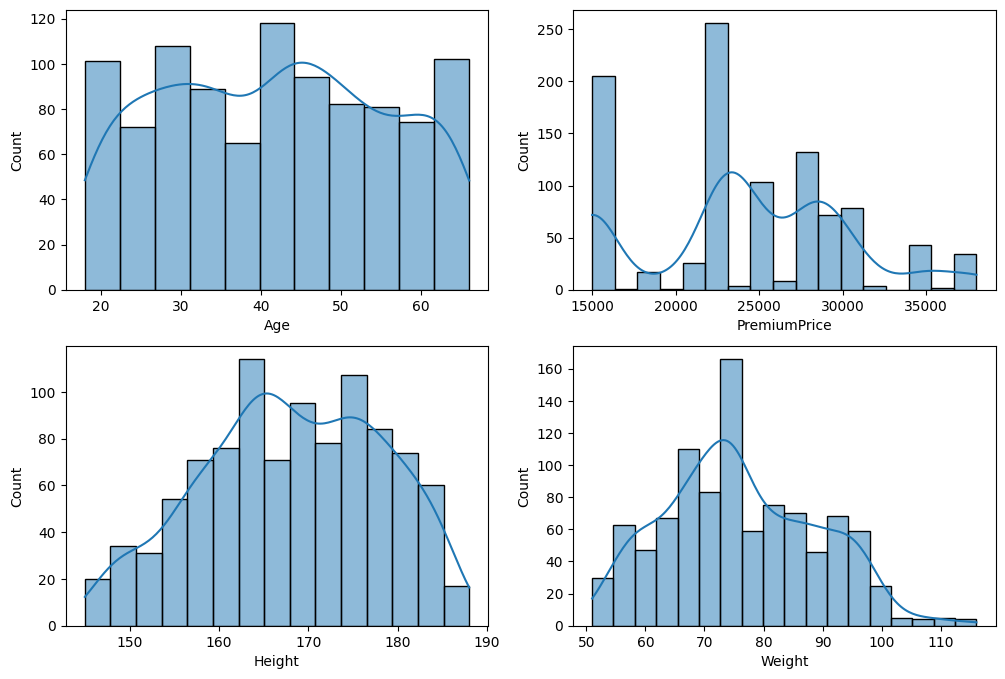

In [65]:
#Distribution Plots for Age, Premium Price, Height and Weight
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data=df, x='Age', kde=True, ax=ax[0, 0])
sns.histplot(data=df, x='PremiumPrice', kde=True, ax=ax[0, 1])
sns.histplot(data=df, x='Height', kde=True, ax=ax[1, 0])
sns.histplot(data=df, x='Weight', kde=True, ax=ax[1, 1])

plt.show()

1. **Age**

- Distribution: The age distribution appears roughly uniform with a slight concentration in the middle-age ranges.

- Insight: The dataset covers a wide range of ages, with a slightly higher frequency of individuals in their middle ages, which might reflect a typical insurance customer base.
2. **Premium Price**

- Distribution: The distribution of premium prices is right-skewed, indicating that lower premium prices are more common, but there are a significant number of higher premium prices.

- Insight: Most individuals are paying lower premiums, but there is a notable proportion of individuals who are paying significantly higher premiums, which could be due to higher risk factors or more comprehensive insurance coverage.

3. **Height**

- Distribution: The height distribution follows a normal distribution with a peak around the average height.

- Insight: Heights in the dataset are normally distributed, suggesting a typical population distribution without extreme outliers.
4. **Weight**

- Distribution: The weight distribution is right-skewed, with more individuals at lower weights and fewer individuals at higher weights.

- Insight: The majority of individuals have lower weights, but there is a tail of higher weights, indicating some individuals may have higher health risks associated with weight.

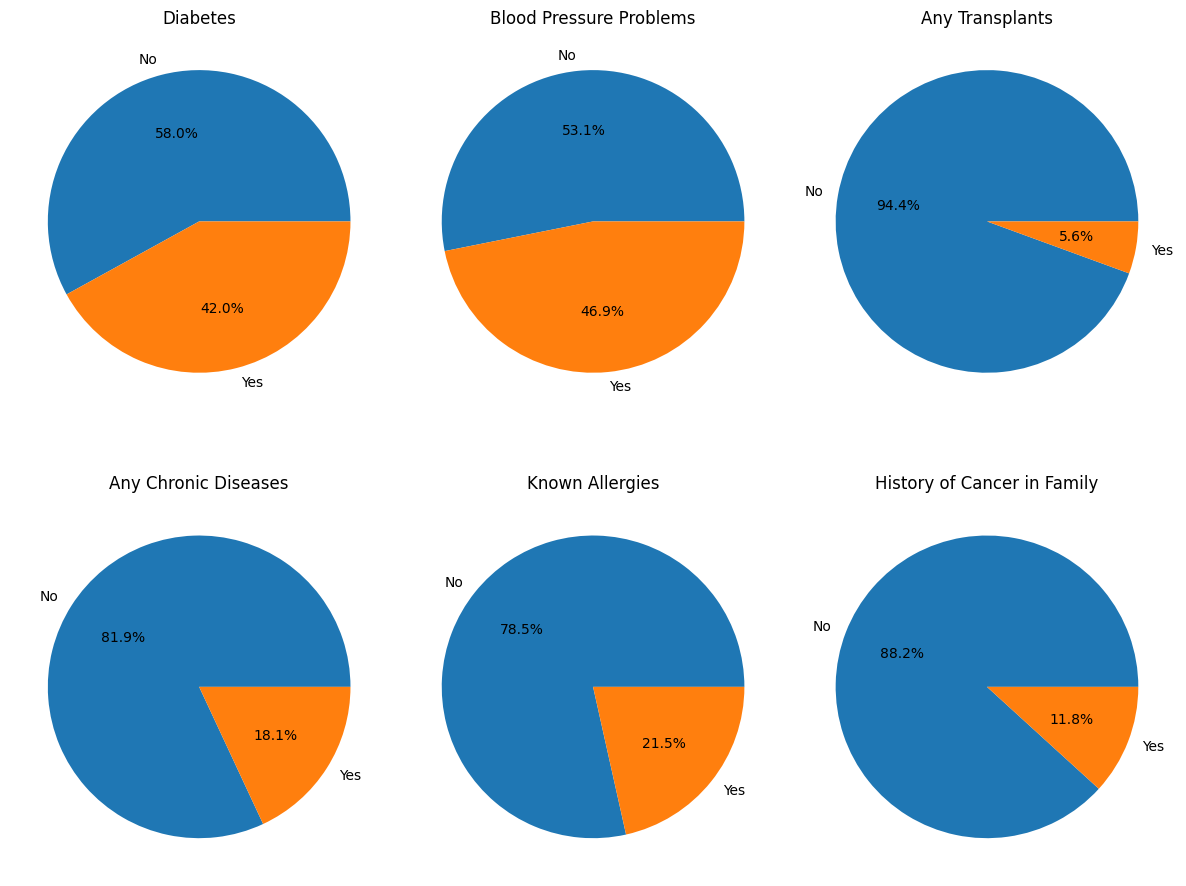

In [66]:
#Health Conditions Distribution
fig, ax = plt.subplots(2, 3, figsize=(12, 10))

ax[0, 0].pie(df['Diabetes'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
ax[0, 0].set_title('Diabetes')

ax[0, 1].pie(df['BloodPressureProblems'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
ax[0, 1].set_title('Blood Pressure Problems')

ax[0, 2].pie(df['AnyTransplants'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
ax[0, 2].set_title('Any Transplants')

ax[1, 0].pie(df['AnyChronicDiseases'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
ax[1, 0].set_title('Any Chronic Diseases')

ax[1, 1].pie(df['KnownAllergies'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
ax[1, 1].set_title('Known Allergies')

ax[1, 2].pie(df['HistoryOfCancerInFamily'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
ax[1, 2].set_title('History of Cancer in Family')

plt.tight_layout()
plt.show()

Insight:

The majority of individuals in the dataset tend to be free from major health conditions such as diabetes, blood pressure problems, transplants, chronic diseases, allergies, and a family history of cancer.

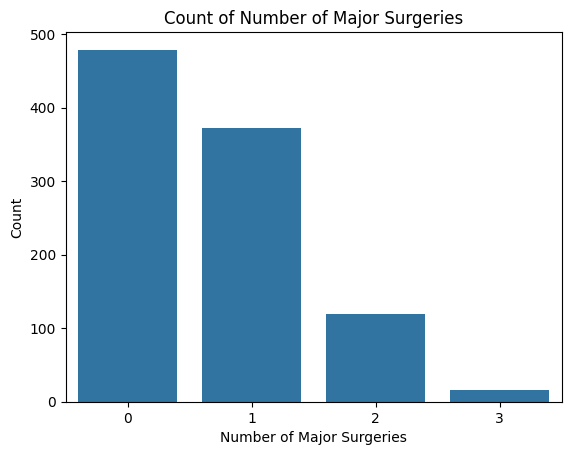

In [67]:
#Distribution of the Number of Major Surgeries
sns.countplot(data=df, x='NumberOfMajorSurgeries')
plt.title('Count of Number of Major Surgeries')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('Count')
plt.show()

Insight:

- Most individuals have had zero major surgeries, indicating a largely healthy population.

- Higher numbers of surgeries are less common but may imply higher medical costs and risks, important for insurance risk assessment.

**Bivariate Analysis**

<Axes: xlabel='AgeGroup', ylabel='PremiumPrice'>

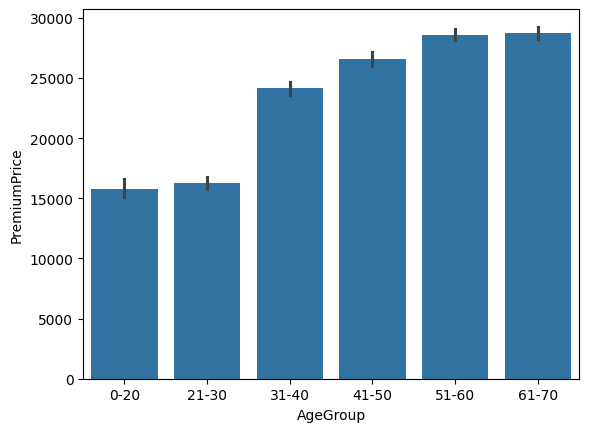

In [68]:
#Premium Price by Age Group
sns.barplot(data=df, x='AgeGroup', y='PremiumPrice')

Insight:
- The Premium Price is higher for elder people.
- Age groups with lower premium prices might be targeted for more affordable insurance options, while those with higher premiums may need more comprehensive coverage options. This can inform marketing and policy design strategies.

<Axes: xlabel='Diabetes', ylabel='PremiumPrice'>

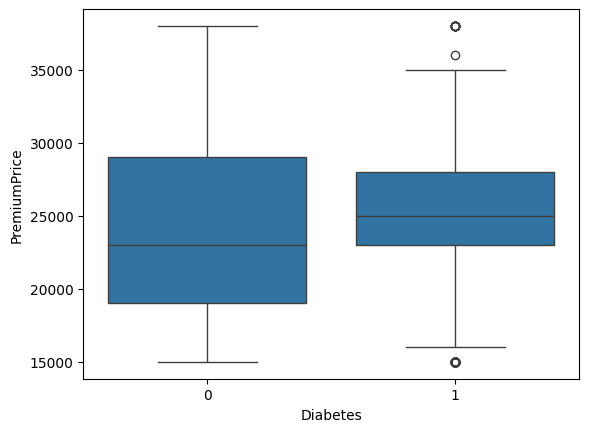

In [69]:
#Box plot of Diabetes vs PremiumPrice
sns.boxplot(x='Diabetes', y='PremiumPrice', data= df)

- Comparing the medians (central lines in the boxes) provides a clear indication of the central tendency of premium prices for both groups. The median premium for those with diabetes is higher, it suggests that insurance companies charge more for individuals with this condition.

<Axes: xlabel='BloodPressureProblems', ylabel='PremiumPrice'>

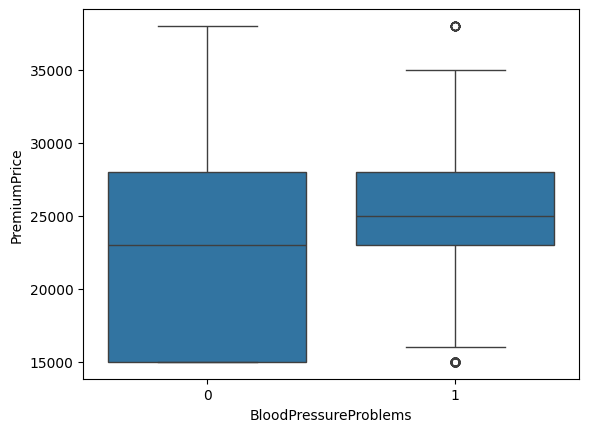

In [70]:
#Box plot of Diabetes vs PremiumPrice
sns.boxplot(x='BloodPressureProblems', y='PremiumPrice', data= df)

- Individuals with blood pressure problems generally have higher premium prices compared to those without blood pressure problems. This reflects the increased health risk associated with this condition.

**Correlation Analysis**

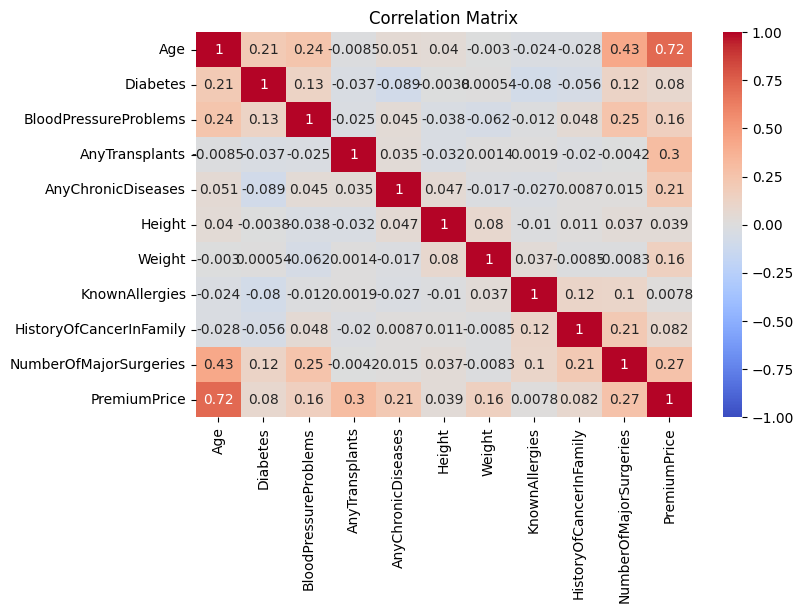

In [71]:
plt.figure(figsize=(8, 5))

df_corr = df[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice']]
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Insight:

1. Age: Strong positive correlation with premium price (0.698). Older individuals tend to have higher premiums due to increased health risks.

2. AnyTransplants: Moderate positive correlation (0.289). Individuals with transplants have higher premiums due to associated medical costs and risks.

3. NumberOfMajorSurgeries: Moderate positive correlation (0.264). More surgeries indicate higher premiums reflecting greater health risks.

4. AnyChronicDiseases: Weak positive correlation (0.209). Chronic diseases lead to higher premiums due to ongoing medical costs.

5. BloodPressureProblems: Weak positive correlation (0.167). Blood pressure issues slightly increase premiums.

6. Weight: Weak positive correlation (0.142). Higher weight may increase premiums due to obesity-related risks.

7. HistoryOfCancerInFamily: Very weak positive correlation (0.083). Family history of cancer slightly impacts premiums.

8. Diabetes: Very weak positive correlation (0.076). Diabetes has a minor effect on premiums.

9. Height: Very weak positive correlation (0.027). Height is not a significant factor in determining premiums.

10. KnownAllergies: Negligible correlation (0.012). Allergies do not significantly influence premiums.

Summary:

Age is the most significant factor influencing insurance premiums, followed by medical history indicators like transplants, major surgeries, and chronic diseases. These factors likely reflect the potential medical costs and health risks considered by insurance companies.


---
---
**Hypothesis Testing**


**Hypothesis 1:** ***Comparison of Mean Premium Prices Between Individuals With and Without Diabetes***

**Null Hypothesis (H₀)**: There is no difference in the mean premium prices between those with diabetes and those without diabetes.


**Alternative Hypothesis (H₁)**: There is a difference in the mean premium prices between those with diabetes and those without diabetes.

alpha = 0.05 (significance value)

In [72]:
# T-test: To compare mean premium prices between those with and without diabetes
diabetes_group = df[df['Diabetes'] == 1]['PremiumPrice']
no_diabetes_group = df[df['Diabetes'] == 0]['PremiumPrice']
t_stat, t_p_value = ttest_ind(diabetes_group, no_diabetes_group)

print(f"T-test results:\nT-statistic: {t_stat}\nP-value: {t_p_value}")

T-test results:
T-statistic: 2.521969504461061
P-value: 0.01182684680834215


Interpretation:

Since the p-value is less than 0.05,we reject null hypothesis. There is a significant difference in mean premium prices between those with and without diabetes.

---

**Hypothesis 2:** ***Comparison of Mean Premium Prices Between Individuals With and Without Blood Pressure Issues***

**Null Hypothesis (H₀)**: There is no difference in the mean premium prices between those with BP and those without BP.


**Alternative Hypothesis (H₁)**: There is a difference in the mean premium prices between those with BP and those without BP.

alpha = 0.05 (significance value)

In [73]:
# T-test: To compare mean premium prices between those with and without BP
BP_group = df[df['BloodPressureProblems'] == 1]['PremiumPrice']
no_BP_group = df[df['BloodPressureProblems'] == 0]['PremiumPrice']
t_stat, t_p_value = ttest_ind(BP_group, no_BP_group)

print(f"T-test results:\nT-statistic: {t_stat}\nP-value: {t_p_value}")

T-test results:
T-statistic: 5.027969389709762
P-value: 5.888132755642318e-07


Interpretation:

Since the p-value is much less than 0.05,we reject null hypothesis. There is a significant difference in mean premium prices between those with and without BP.

---

**Hypothesis 3:** ***Comparison of Mean Premium Prices Between Individuals With and Without Any Transplant***

**Null Hypothesis (H₀)**: There is no difference in the mean premium prices between those with any transplant and those without transplant.


**Alternative Hypothesis (H₁)**: There is a difference in the mean premium prices between those with any transplant and those without transplant.

alpha = 0.05 (significance value)

In [74]:
# T-test: To compare mean premium prices between those with and without any Transplant
Transplant_group = df[df['AnyTransplants'] == 1]['PremiumPrice']
no_transplant_group = df[df['AnyTransplants'] == 0]['PremiumPrice']
t_stat, t_p_value = ttest_ind(Transplant_group, no_transplant_group)

print(f"T-test results:\nT-statistic: {t_stat}\nP-value: {t_p_value}")

T-test results:
T-statistic: 9.79432871103198
P-value: 1.1215576336296038e-21


Interpretation:

Since the p-value is much less than 0.05,we reject null hypothesis. There is a significant difference in mean premium prices between those with and without any transplant.

---

**Hypothesis 4:** ***Comparison of Mean Premium Prices Between Individuals With and Without Any Chronic Diseases***

**Null Hypothesis (H₀)**: There is no difference in the mean premium prices between those with any chronic diseases and those without chronic diseases.


**Alternative Hypothesis (H₁)**: There is a difference in the mean premium prices between those with any chronic diseases and those without chronic diseases.

alpha = 0.05 (significance value)

In [75]:
# T-test: To compare mean premium prices between those with and without any Chronic Diseases
chronic_disease_group = df[df['AnyChronicDiseases'] == 1]['PremiumPrice']
no_chronic_disease_group = df[df['AnyChronicDiseases'] == 0]['PremiumPrice']
t_stat, t_p_value = ttest_ind(chronic_disease_group, no_chronic_disease_group)

print(f"T-test results:\nT-statistic: {t_stat}\nP-value: {t_p_value}")

T-test results:
T-statistic: 6.8217508519589805
P-value: 1.5687645285121267e-11


Interpretation:

Since the p-value is much less than 0.05,we reject null hypothesis. There is a significant difference in mean premium prices between those with and without any chronic diseases.

---

**Hypothesis 5:** ***Comparison of Mean Premium Prices Between Individuals With and Without Any Known Allergies***

**Null Hypothesis (H₀)**: There is no difference in the mean premium prices between those with any allergies and those without allergies.


**Alternative Hypothesis (H₁)**: There is a difference in the mean premium prices between those with any allergies and those without allergies.

alpha = 0.05 (significance value)

In [76]:
# T-test: To compare mean premium prices between those with and without any Known Allergies
Known_Allergies_group = df[df['KnownAllergies'] == 1]['PremiumPrice']
no_Known_Allergies_group = df[df['KnownAllergies'] == 0]['PremiumPrice']
t_stat, t_p_value = ttest_ind(Known_Allergies_group , no_Known_Allergies_group )

print(f"T-test results:\nT-statistic: {t_stat}\nP-value: {t_p_value}")

T-test results:
T-statistic: 0.2457217348326698
P-value: 0.8059488873626007


Interpretation:

Since the p-value is much greater than 0.05,we fail to reject null hypothesis. There is no significant difference in mean premium prices between those with and without any allergies.

---

**Hypothesis 6:** ***Comparison of Mean Premium Prices Between Individuals With and Without History Of Cancer In Family***

**Null Hypothesis (H₀)**: There is no difference in the mean premium prices between those with History Of Cancer In Family and those without.


**Alternative Hypothesis (H₁)**: There is a difference in the mean premium prices between those with History Of Cancer In Family and those without

alpha = 0.05 (significance value)

In [77]:
# T-test: To compare mean premium prices between those with and without any History Of Cancer In Family
cancer_group = df[df['HistoryOfCancerInFamily'] == 1]['PremiumPrice']
no_cancer_group = df[df['HistoryOfCancerInFamily'] == 0]['PremiumPrice']
t_stat, t_p_value = ttest_ind(cancer_group , no_cancer_group )

print(f"T-test results:\nT-statistic: {t_stat}\nP-value: {t_p_value}")

T-test results:
T-statistic: 2.5888486173220615
P-value: 0.009771832668201131


Interpretation:

Since the p-value is much greater than 0.05,we reject null hypothesis. There is a significant difference in mean premium prices between those with History of cancer in family and and those without.

---

**Hypothesis 7:** ***Comparison of mean premium prices across different numbers of major surgeries***

**Null Hypothesis (H₀)**: There is no difference in the mean premium prices across different numbers of major surgeries.


**Alternative Hypothesis (H₁)**: There is a difference in the mean premium prices across different numbers of major surgeries.

alpha = 0.05 (significance value)

Since we have multiple categories in no. of major surgeries ,we'll use ANOVA test for analysis, but we need to make sure that ANOVA assumptions are satisfied.
1. Data should be normally distributed.
2. Data should be independent across each record.
3. Equal variave in different groups.

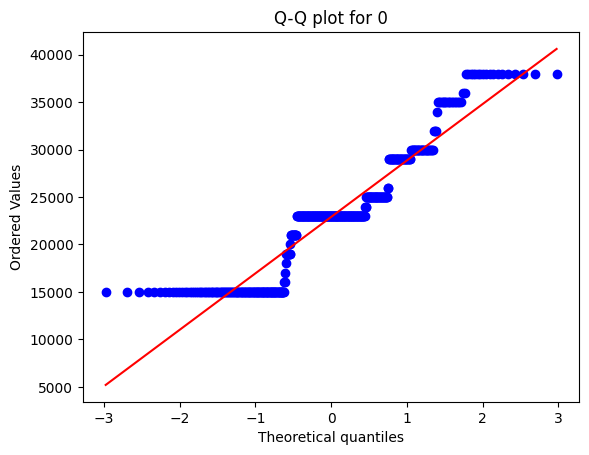

Shapiro-Wilk test for 0: W=0.8876535164265824, p-value=3.306072508451879e-18


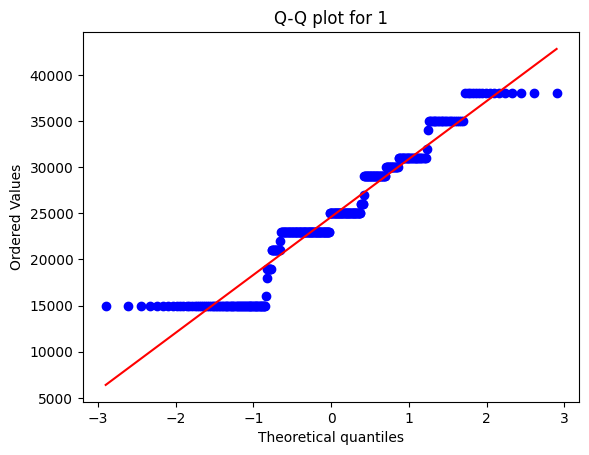

Shapiro-Wilk test for 1: W=0.9290589412097161, p-value=2.71518037196034e-12


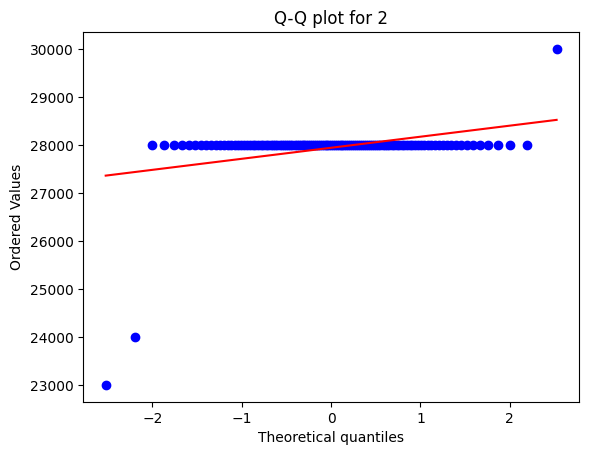

Shapiro-Wilk test for 2: W=0.15299107030653636, p-value=3.8219224932103633e-23


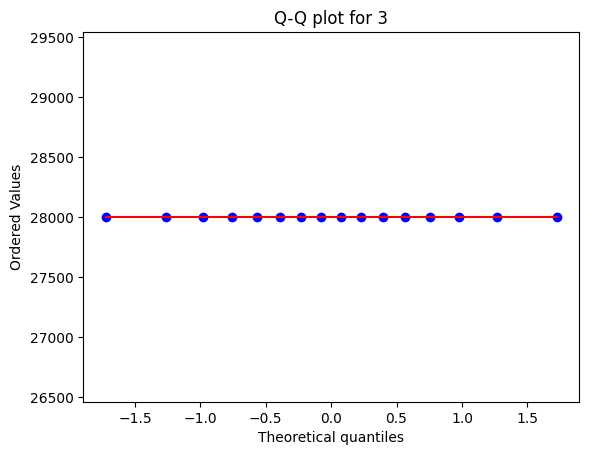

Shapiro-Wilk test for 3: W=1.0, p-value=1.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [78]:
# Check for normality using Q-Q plot and Shapiro-Wilk test
for surgeries in df['NumberOfMajorSurgeries'].unique():
    surgeries_data = df[df['NumberOfMajorSurgeries'] == surgeries]['PremiumPrice']
    stats.probplot(surgeries_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {surgeries}')
    plt.show()
    shapiro_test = stats.shapiro(surgeries_data)
    print(f'Shapiro-Wilk test for {surgeries}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

From the QQ Plots, and shapiro test we can infer that data for each category does not follow normality assumption.

In [79]:
# Check for homogeneity of variances using Levene's test
levene_test = stats.levene(*[df[df['NumberOfMajorSurgeries'] == surgeries]['PremiumPrice'] for surgeries in df['NumberOfMajorSurgeries'].unique()])
print(f"Levene's test for homogeneity of variances: W={levene_test.statistic}, p-value={levene_test.pvalue}")

Levene's test for homogeneity of variances: W=58.550529776325284, p-value=7.967394945859329e-35


As the p-value is much less than alpha value, it indicates that samples do not have equal variance.

Since both the assumptions of ANOVA fail, we'll perform KS test for this hypothesis.

In [80]:
groups = df.groupby('NumberOfMajorSurgeries')

# Perform the KS test for each pair of groups
for i, (name1, group1) in enumerate(groups):
    for j, (name2, group2) in enumerate(groups):
        if i < j:  # avoid duplicate comparisons
            group1_premiums = group1['PremiumPrice']
            group2_premiums = group2['PremiumPrice']
            ks_stat, p_val = stats.ks_2samp(group1_premiums, group2_premiums)
            print(f"KS test between {name1} and {name2} major surgeries:")
            print(f"  KS statistic: {ks_stat:.4f}")
            print(f"  p-value: {p_val:.4f}")
            print("  ---")
            if p_val < 0.05:
                print(f"  Reject H0: The distributions of PremiumPrice are significantly different between {name1} and {name2} major surgeries")
            else:
                print(f"  Fail to reject H0: The distributions of PremiumPrice are not significantly different between {name1} and {name2} major surgeries")
            print()

KS test between 0 and 1 major surgeries:
  KS statistic: 0.1866
  p-value: 0.0000
  ---
  Reject H0: The distributions of PremiumPrice are significantly different between 0 and 1 major surgeries

KS test between 0 and 2 major surgeries:
  KS statistic: 0.7598
  p-value: 0.0000
  ---
  Reject H0: The distributions of PremiumPrice are significantly different between 0 and 2 major surgeries

KS test between 0 and 3 major surgeries:
  KS statistic: 0.7766
  p-value: 0.0000
  ---
  Reject H0: The distributions of PremiumPrice are significantly different between 0 and 3 major surgeries

KS test between 1 and 2 major surgeries:
  KS statistic: 0.6472
  p-value: 0.0000
  ---
  Reject H0: The distributions of PremiumPrice are significantly different between 1 and 2 major surgeries

KS test between 1 and 3 major surgeries:
  KS statistic: 0.6640
  p-value: 0.0000
  ---
  Reject H0: The distributions of PremiumPrice are significantly different between 1 and 3 major surgeries

KS test between 2 an

Interpretaion:

The distributions of Premium Price are not significantly different between 2 and 3 major surgeries

The distributions of Premium Price seem to be significantly different across all other combinations.

---

**Hypothesis 8:** ***To check the association between the presence of chronic disease and the history of cancer in the family***

**Null Hypothesis (H₀)**: There is no association between the presence of chronic disease and the history of cancer in the family.


**Alternative Hypothesis (H₁)**: There is an association between the presence of chronic disease and the history of cancer in the family.

alpha = 0.05 (significance value)

In [81]:
# Create a contingency table
contingency_table= pd.crosstab(df['AnyChronicDiseases'], df['HistoryOfCancerInFamily'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square test statistic: {chi2_stat}')
print(f'p-value: {p_value}')

Chi-square test statistic: 0.02062393388215223
p-value: 0.8858081638149811


Interpretation:

 The p-value is much greater than 0.05, suggesting no significant association between the presence of chronic disease and the history of cancer in the family.

 ---

**Hypothesis 1:** ***Comparison of Mean Premium Prices Across Different Age Groups***

**Null Hypothesis (H₀)**: There is no significant difference in premium prices across different age bins.


**Alternative Hypothesis (H₁)**: There is a significant difference in premium prices across different age bins.

alpha = 0.05 (significance value)

Since we have multiple categories we'll use ANOVA.
Before that, lets check if all the assumptions of ANOVA are satisfied.

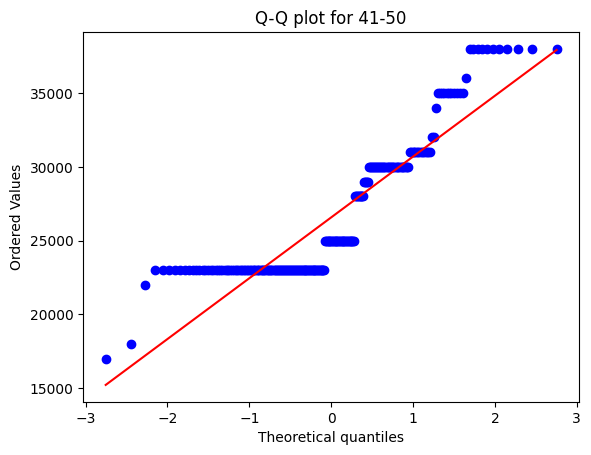

Shapiro-Wilk test for 41-50: W=0.8153944555435926, p-value=5.390354913299903e-16


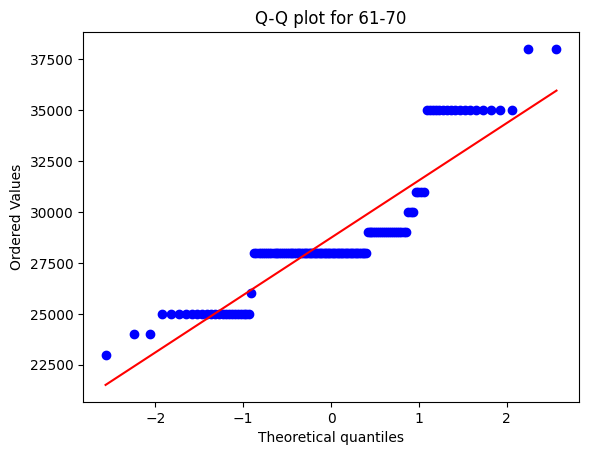

Shapiro-Wilk test for 61-70: W=0.8098408892126252, p-value=6.060390420386284e-12


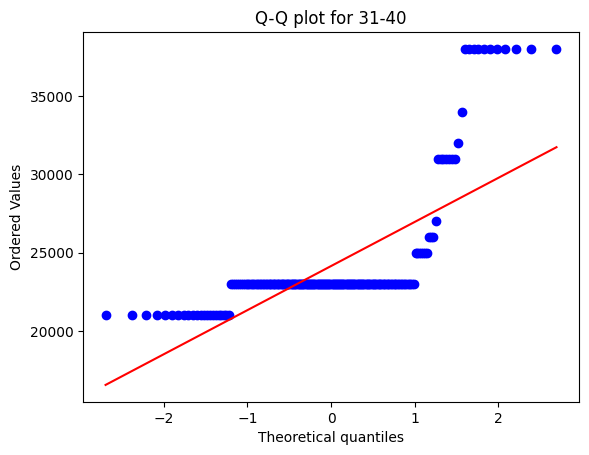

Shapiro-Wilk test for 31-40: W=0.5027527133903545, p-value=3.16050419888815e-23


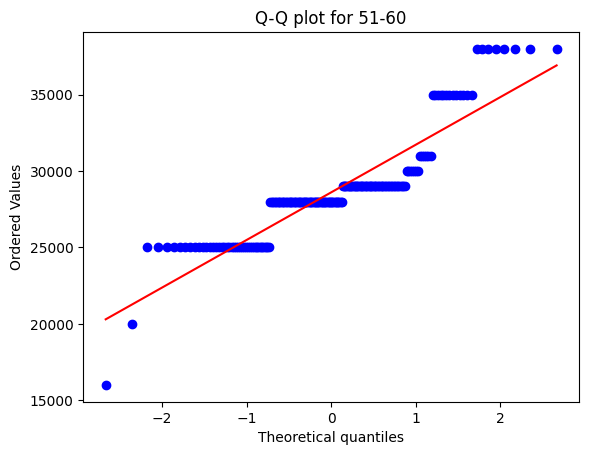

Shapiro-Wilk test for 51-60: W=0.8338063296035613, p-value=4.299445252680379e-13


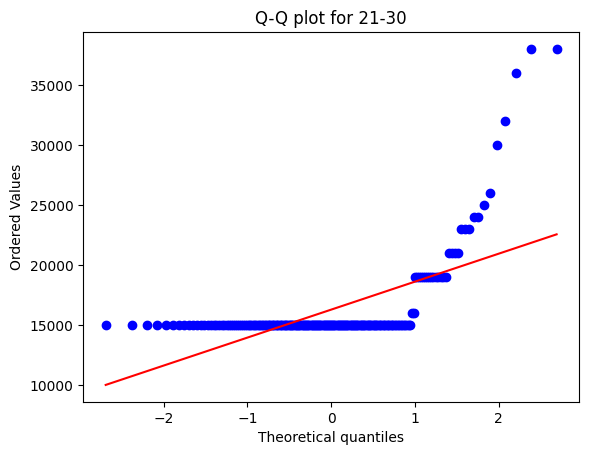

Shapiro-Wilk test for 21-30: W=0.3948871090831041, p-value=3.653453478895039e-25


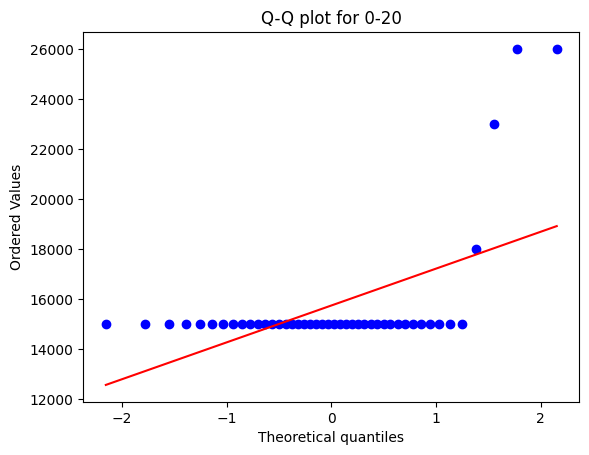

Shapiro-Wilk test for 0-20: W=0.3164490890345084, p-value=4.901158174327391e-13


In [82]:
# Check for normality using Q-Q plot and Shapiro-Wilk test
for grp in df['AgeGroup'].unique():
    grp_data = df[df['AgeGroup'] == grp]['PremiumPrice']
    stats.probplot(grp_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {grp}')
    plt.show()
    shapiro_test = stats.shapiro(grp_data)
    print(f'Shapiro-Wilk test for {grp}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

From the QQ Plots, and shapiro test we can infer that data for each category does not follow normality assumption.

Lets perform KS Test to check our hypothesis.

In [83]:
# List of unique age groups
age_groups = df['AgeGroup'].unique()

# Perform KS test between different age groups for Premium Price
ks_test_results = {}
for i in range(len(age_groups)):
    for j in range(i+1, len(age_groups)):
        group1 = df[df['AgeGroup'] == age_groups[i]]['PremiumPrice']
        group2 = df[df['AgeGroup'] == age_groups[j]]['PremiumPrice']
        if not group1.empty and not group2.empty:
            ks_stat, p_value = stats.ks_2samp(group1, group2)
            ks_test_results[f'{age_groups[i]} vs {age_groups[j]}'] = (ks_stat, p_value)

# Display the results
for comparison, (ks_stat, p_value) in ks_test_results.items():
    print(f"Comparison: {comparison}")
    print(f"KS Statistic: {ks_stat:.3f}, P-value: {p_value:.3e}")
    if p_value < 0.05:
        print("There is a significant difference in premium prices between these age groups.\n")
    else:
        print("There is no significant difference in premium prices between these age groups.\n")

Comparison: 41-50 vs 61-70
KS Statistic: 0.461, P-value: 5.621e-17
There is a significant difference in premium prices between these age groups.

Comparison: 41-50 vs 31-40
KS Statistic: 0.374, P-value: 8.302e-14
There is a significant difference in premium prices between these age groups.

Comparison: 41-50 vs 51-60
KS Statistic: 0.457, P-value: 7.910e-20
There is a significant difference in premium prices between these age groups.

Comparison: 41-50 vs 21-30
KS Statistic: 0.930, P-value: 9.295e-101
There is a significant difference in premium prices between these age groups.

Comparison: 41-50 vs 0-20
KS Statistic: 0.923, P-value: 9.204e-37
There is a significant difference in premium prices between these age groups.

Comparison: 61-70 vs 31-40
KS Statistic: 0.834, P-value: 2.373e-57
There is a significant difference in premium prices between these age groups.

Comparison: 61-70 vs 51-60
KS Statistic: 0.107, P-value: 3.123e-01
There is no significant difference in premium prices betw

Interpretation:

The KS test reveals significant differences in premium prices across most age groups, supporting the observation that age is a strong predictor of premium price.

 ---
 ---

**Model Building**

In [84]:
#Importing Necessary Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import  MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [85]:
# Feature Engineering: Creating BMI
df['BMI'] = df['Weight'] / (df['Height']/100) ** 2

In [86]:
# Defining features and target variable
X = df.drop(columns=['PremiumPrice', 'AgeGroup'])
y = df['PremiumPrice']

In [87]:
#Splitting the data into train, validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)
X_train, X_val, y_train,y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 7)

***Linear Regression***

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
#Weights of the features (coefficients)
weights = model.coef_.round(3)
for i, feature in enumerate(X_train.columns):
 print(f"{feature}: {weights[i]}")


Age: 339.153
Diabetes: -577.525
BloodPressureProblems: -14.532
AnyTransplants: 7596.604
AnyChronicDiseases: 2609.135
Height: -113.593
Weight: 188.343
KnownAllergies: 100.469
HistoryOfCancerInFamily: 2245.985
NumberOfMajorSurgeries: -770.725
BMI: -360.5


Insights:
- Age and Weight are the most significant predictors, with higher values leading to higher premiums.
- AnyTransplants and AnyChronicDiseases also have strong positive impacts on premium prices.
- Some features like Diabetes, BloodPressureProblems, KnownAllergies, and NumberOfMajorSurgeries have smaller impacts, indicating that these factors may not be as influential in determining premium prices.
- The unexpected signs for some coefficients, such as Height and BMI, suggest potential interactions or multicollinearity with other features that need to be explored further.

Lets assess the multicollinearity among the features to understand if some features are highly correlated, which can affect the stability of the coefficients.


In [90]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Aligning indices for VIF calculation
X_train_aligned, y_train_aligned = X_train.align(y_train, axis=0)

# Fill NaNs with mean and replace infinite values with finite numbers
X_train_aligned = X_train_aligned.fillna(X_train_aligned.mean())
X_train_aligned = X_train_aligned.replace([np.inf, -np.inf], np.nan).fillna(X_train_aligned.mean())

# Checking for NaNs and infinite values in the aligned training data
print("Checking for NaNs and infinite values in X_train_aligned:")
print(X_train_aligned.isnull().sum())
print(np.isinf(X_train_aligned).sum())

# Adding a constant to the model (required for statsmodels regression)
numeric_features = ['Age', 'Height', 'Weight', 'BMI']
X_train_const = sm.add_constant(X_train_aligned[numeric_features])

# Fit the regression model
model_vif = sm.OLS(y_train_aligned, X_train_const).fit()

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Variable'] = X_train_const.columns
vif['VIF'] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
print(vif)

Checking for NaNs and infinite values in X_train_aligned:
Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
BMI                        0
dtype: int64
Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
BMI                        0
dtype: int64
  Variable          VIF
0    const  9291.298925
1      Age     1.003580
2   Height    33.176416
3   Weight    60.268524
4      BMI    82.937347


- The attributes Height, Weight and BMI have high VIF indicating significant multicollinearity.
- Lets remove Height and Weight and consider using only BMI as it captures the information from both Height and Weight.

In [91]:
# Define the revised feature set
X_revised = X.drop(columns=['Height', 'Weight'])

#Splitting the data into train, validation and test sets with the revised feature set
X_train_val, X_test, y_train_val, y_test = train_test_split(X_revised,y, test_size = 0.2, random_state = 7)
X_train, X_val, y_train,y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 7)

# Recalculate VIF for the revised feature set
X_train_aligned, y_train_aligned = X_train.align(y_train, axis=0)

# Fill NaNs with mean and replace infinite values with finite numbers
X_train_aligned = X_train_aligned.fillna(X_train_aligned.mean())
X_train_aligned = X_train_aligned.replace([np.inf, -np.inf], np.nan).fillna(X_train_aligned.mean())

# Adding a constant to the model (required for statsmodels regression)
X_train_const = sm.add_constant(X_train_aligned)

# Fit the regression model and calculate VIF
model_vif = sm.OLS(y_train_aligned, X_train_const).fit()
vif = pd.DataFrame()
vif['Variable'] = X_train_const.columns
vif['VIF'] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
print(vif)


                  Variable        VIF
0                    const  37.490257
1                      Age   1.343614
2                 Diabetes   1.048959
3    BloodPressureProblems   1.089967
4           AnyTransplants   1.002451
5       AnyChronicDiseases   1.024398
6           KnownAllergies   1.027947
7  HistoryOfCancerInFamily   1.067245
8   NumberOfMajorSurgeries   1.374412
9                      BMI   1.010127


- The VIFs seem to be fine now, lets now proceed with training the model with the revised feature set.

In [92]:
#Train and fitting the model on revised dataset
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [93]:
#Creating a function to assess model's performamce
def model_evaluation(y_true, y_pred, model, X_train):
    # Calculate evaluation metrics
    mae = np.round(mean_absolute_error(y_true, y_pred), 2)
    rmse = np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)
    r2 = np.round(r2_score(y_true, y_pred), 2)
    n = len(y_true)
    p = X_train.shape[1]
    adj_r2 = np.round(1 - (1 - r2) * (n - 1) / (n - p - 1), 2)


    # Store metrics in a dictionary
    metrics = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'Adjusted R2': adj_r2
    }

    return metrics

In [94]:
model_evaluation(y_val, y_pred, model, X_train)

{'MAE': 2631.9, 'RMSE': 3498.29, 'R2': 0.68, 'Adjusted R2': 0.66}

- The evaluation metrics don't seem great suggesting that model is not performing well.
- While the linear regression model provides a baseline for prediction accuracy, the error margins indicate room for improvement. Non-linear relationships and interactions between features might not be well-captured by this model.

In [95]:
# Adding polynomial features and re evaluating the model
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

model.fit(X_train_poly, y_train)
y_pred = model.predict(X_val_poly)
model_evaluation(y_val, y_pred, model, X_train_poly)

{'MAE': 2447.16, 'RMSE': 3302.55, 'R2': 0.71, 'Adjusted R2': 0.6}

The introduction of polynomial features improved the model performance, but it is still not satisfactory.

Lets test another model.

---
---

***Decision Tree Regressor***

In [96]:
dt_model = DecisionTreeRegressor(max_depth = 6, random_state = 42 )
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [97]:
y_pred_dt = dt_model.predict(X_val)

model_evaluation(y_val, y_pred_dt, dt_model, X_train)

{'MAE': 1312.13, 'RMSE': 2798.3, 'R2': 0.79, 'Adjusted R2': 0.78}

- The Decision Tree model performs better than the Linear Regression.

- However the difference between MAE and RMSE suggests the presence of some larger errors.


In [98]:
# Re-evaluating the model with polynomial features
dt_model.fit(X_train_poly, y_train)
y_pred_dt = dt_model.predict(X_val_poly)
model_evaluation(y_val, y_pred_dt, dt_model, X_train_poly)

{'MAE': 1386.69, 'RMSE': 2945.4, 'R2': 0.77, 'Adjusted R2': 0.68}

The introduction of polynomial features and interaction terms does not improve the model's ability to capture complex relationships in the data.




**Hyperparameter Tuning**

Further lets tune the hyperparameters of the Decision Tree model, such as adjusting the maximum depth, minimum samples split, and minimum samples leaf to find the optimal configuration

In [99]:
#Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator= DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Decision Tree - Best Parameters: {grid_search.best_params_}")
print(f"Decision Tree - Best Score: {np.sqrt(-grid_search.best_score_):.2f}")

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict using the best model
y_pred_best = best_model.predict(X_val)

# Evaluate the best model
metrics_best = model_evaluation(y_val, y_pred_best, best_model, X_train)

print("Best Decision Tree Performance Metrics:")
for metric, value in metrics_best.items():
    print(f"{metric}: {value:.2f}")

Decision Tree - Best Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree - Best Score: 2811.95
Best Decision Tree Performance Metrics:
MAE: 1324.82
RMSE: 2799.43
R2: 0.79
Adjusted R2: 0.78


The best parameters for Decision Tree Regressor are 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5

---
---

***Random Forest***

In [100]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [101]:
y_pred_rf = rf_model.predict(X_val)
model_evaluation(y_val, y_pred_rf, rf_model, X_train)

{'MAE': 1312.99, 'RMSE': 2265.44, 'R2': 0.86, 'Adjusted R2': 0.85}

Random Forests seem to provide more accurate predictions than a single Decision Tree. This is evident from the lower MAE & RMSE and higher R2 and Adjusted R2 scores.

**Hyperparameter Tuning**

In [102]:
# Define the parameter grid for GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search for Random Forest
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the best score for Random Forest
print(f"Random Forest - Best Parameters: {grid_search_rf.best_params_}")
print(f"Random Forest - Best Score: {np.sqrt(-grid_search_rf.best_score_):.2f}")

# Train the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predict using the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_val)

# Evaluate the best Random Forest model
best_rf_model.fit(X_train, y_train)
metrics_best_rf = model_evaluation(y_val, y_pred_best_rf,best_rf_model , X_train)

print("Best Random Forest Performance Metrics:")
for metric, value in metrics_best_rf.items():
    print(f"{metric}: {value:.2f}")

Random Forest - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest - Best Score: 2603.69
Best Random Forest Performance Metrics:
MAE: 1289.47
RMSE: 2216.87
R2: 0.87
Adjusted R2: 0.86


The best parameters for Random Forest Regressor are {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

---
---

***Gradient Boosting***

In [103]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [104]:
y_pred_gb = gb_model.predict(X_val)
model_evaluation(y_val, y_pred_gb, gb_model, X_train)

{'MAE': 1539.2, 'RMSE': 2284.27, 'R2': 0.86, 'Adjusted R2': 0.85}

**Hyperparameter Tuning**

In [105]:
# Define the parameter grid for GridSearchCV for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search for Gradient Boosting
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and the best score for Gradient Boosting
print(f"Gradient Boosting - Best Parameters: {grid_search_gb.best_params_}")
print(f"Gradient Boosting - Best Score: {np.sqrt(-grid_search_gb.best_score_):.2f}")

# Train the best Gradient Boosting model
best_gb_model = grid_search_gb.best_estimator_
best_gb_model.fit(X_train, y_train)

# Predict using the best Gradient Boosting model
y_pred_best_gb = best_gb_model.predict(X_val)

# Evaluate the best Gradient Boosting model
metrics_best_gb = model_evaluation(y_val, y_pred_best_gb, best_gb_model, X_train)

print("Best Gradient Boosting Performance Metrics:")
for metric, value in metrics_best_gb.items():
    print(f"{metric}: {value:.2f}")

Gradient Boosting - Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Gradient Boosting - Best Score: 2606.59
Best Gradient Boosting Performance Metrics:
MAE: 1633.89
RMSE: 2367.71
R2: 0.85
Adjusted R2: 0.84


The best parameters for Gradient Boosting are {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

**Model Comparison: Decision Tree, Random Forest, and Gradient Boosting**



**The Random Forest model provides the best balance of accuracy and complexity. Its lower MAE and RMSE, along with higher R² and Adjusted R², indicate it is the most reliable model for predicting insurance premium prices.**

---

**Cross-Validation**

In [106]:
# Define the Random Forest model with best parameters
best_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
rf_model = RandomForestRegressor(**best_params, random_state=42)

# Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"Cross-Validated RMSE: {cv_rmse_scores.mean():.2f} (± {cv_rmse_scores.std():.2f})")

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf_model.predict(X_val)

# Evaluate the model on the validation set
val_metrics = model_evaluation(y_val, y_pred_val,rf_model, X_train)
print("Validation Set Performance Metrics:")
for metric, value in val_metrics.items():
    print(f"{metric}: {value:.2f}")

# Predict on the test set
y_pred_test = rf_model.predict(X_test)

# Evaluate the model on the test set
test_metrics = model_evaluation(y_test, y_pred_test, rf_model, X_train)
print("Test Set Performance Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.2f}")

Cross-Validated RMSE: 2609.20 (± 309.41)
Validation Set Performance Metrics:
MAE: 1289.47
RMSE: 2216.87
R2: 0.87
Adjusted R2: 0.86
Test Set Performance Metrics:
MAE: 1638.96
RMSE: 3202.99
R2: 0.71
Adjusted R2: 0.70


**Creating Final model with best parameters**

In [107]:
rf = RandomForestRegressor(max_depth = 10, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 300)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
model_evaluation(y_test, y_pred, rf, X_train)

{'MAE': 1623.12, 'RMSE': 3191.99, 'R2': 0.71, 'Adjusted R2': 0.7}

**Saving the Trained Model**

In [108]:
import pickle

# Save the model
pickle_out = open("trained_model.pkl", "wb")
pickle.dump(rf, pickle_out)
pickle_out.close()




---



---
**Insights from Exploratory Data Analysis (EDA):**

* The distribution of PremiumPrice is right-skewed, indicating that most individuals have lower premium prices,
but there are a few with significantly higher premiums.

* There appears to be a positive correlation between Age and PremiumPrice, suggesting that older individuals
tend to have higher premium prices. This could be due to increased health risks associated with aging.

* The heatmap reveals correlations between various features and PremiumPrice. Key features like BMI, Diabetes,
and AnyChronicDiseases show a noticeable correlation with the target variable.

* Features like BMI, AnyChronicDiseases, Diabetes, AnyTransplants, and BloodPressureProblems were among the
most significant predictors of PremiumPrice. This aligns with domain knowledge that these factors
significantly impact health risks and insurance costs.



In [112]:
!pip install nbconvert


In [111]:
!jupyter nbconvert --to html InsuranceCostPrediction.ipynb

[NbConvertApp] Converting notebook InsuranceCostPrediction.ipynb to html
[NbConvertApp] Writing 1673054 bytes to InsuranceCostPrediction.html
